# <font color='blue'>Análise Estatística de Dados com NumPy Para a Área de Marketing</font>

## 1. Definição do Problema de Negócio

### 1.1. Contexto

Uma plataforma de e-commerce coleta um volume significativo de dados sobre a interação dos usuários com o site, incluindo o número de visitas, a duração da sessão, a atividade de adição de produtos ao carrinho e os valores de compra finalizados. No entanto, esses dados estão sendo subutilizados. Atualmente, as decisões sobre campanhas de marketing, promoções e melhorias na experiência do usuário (UX) são tomadas com base em intuição e métricas de alto nível, sem uma compreensão aprofundada dos padrões de comportamento que impulsionam os resultados.

### 1.2. Problema de Negócio

A empresa enfrenta o desafio de compreender profundamente os padrões de comportamento que diferenciam os clientes de alto valor dos visitantes que abandonam o site sem comprar. Essa falta de clareza resulta em:

- Marketing Genérico: Nossas campanhas de marketing são de "tamanho único", resultando em baixo engajamento e desperdício de orçamento, pois não conseguimos personalizar as ofertas para os segmentos de clientes corretos.

- Perda de Oportunidades: Não conseguimos identificar e engajar proativamente os clientes com maior potencial de compra ou criar estratégias para converter os visitantes que demonstram interesse, mas não finalizam a compra.

- Decisões Não Embasadas: As estratégias de produto e de experiência do usuário carecem de uma base quantitativa sólida sobre quais comportamentos (ex: tempo no site, frequência de visitas) estão mais fortemente correlacionados com o sucesso das vendas.

### 1.3. Objetivo Principal

Utilizar a análise estatística dos dados de navegação e compra para segmentar clientes, identificar os principais indicadores de comportamento que levam à conversão e fornecer insights acionáveis para as equipes de marketing e produto, a fim de aumentar o ticket médio e a taxa de conversão geral da plataforma.

### 1.4. Perguntas-Chave a Serem Respondidas

A análise de dados deve responder às seguintes perguntas críticas de negócio:

- 1- Qual é o perfil médio do nosso usuário em termos de visitas, tempo de navegação e valor de compra (ticket médio)?

- 2- Quais são as características e comportamentos distintos dos nossos clientes de "Alto Valor"? Eles visitam mais o site? Passam mais tempo navegando?

- 3- Qual é o comportamento dos usuários que visitam o site, mas não realizam nenhuma compra? Onde está a oportunidade de conversão com este grupo?

- 4- Existe uma correlação estatisticamente relevante entre o tempo gasto no site, o número de itens no carrinho e o valor final da compra?

### 1.5. Resultado Esperado e Impacto no Negócio

O resultado deste projeto será um relatório de análise estatística que permitirá:

- Segmentação Aprimorada: Criação de pelo menos dois segmentos de clientes (ex: "Clientes de Alto Valor" e "Visitantes Engajados sem Compra") para direcionamento de campanhas de marketing personalizadas.

- Otimização de Marketing: Direcionar o orçamento de marketing para ações focadas nos comportamentos que mais se correlacionam com compras de alto valor, aumentando o Retorno Sobre o Investimento (ROI).

- Melhoria da Experiência do Usuário (UX): Fornecer à equipe de produto dados que possam justificar testes A/B ou melhorias em áreas do site frequentadas por usuários que não convertem.

## 2. Importação das Bibliotecas

In [1]:
# Instala o pacote watermark
!pip install -q -U watermark

In [2]:
# Instalando o Numpy
!pip install -q numpy==2.3.2

In [3]:
# importando a biblioteca Numpy
import numpy as np

In [4]:
# Outros Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
%reload_ext watermark
%watermark -a "Cleidson Goes"

Author: Cleidson Goes



In [6]:
%watermark --iversions

matplotlib: 3.10.7
numpy     : 2.3.2
pandas    : 2.3.3
seaborn   : 0.13.2



## 3. Importação da base de dados

In [7]:
dados_ecommerce = np.loadtxt(
    'dados_ecommerce.csv',
    delimiter = ',',
    skiprows = 1
)

## 4. Análise Estatística Descritiva
### Pergunta 1

Qual é o perfil médio do nosso usuário em termos de visitas, tempo de navegação e valor de compra (ticket médio)?

In [8]:
# Separando as colunas para facilitar a leitura do código
visitas_col = dados_ecommerce[:, 0]
tempo_col = dados_ecommerce[:, 1]
itens_col = dados_ecommerce[:, 2]
valor_col = dados_ecommerce[:, 3]

print("--- ANÁLISE ESTATÍSTICA GERAL ---")

# Média
media_visitas = np.mean(visitas_col)
media_tempo = np.mean(tempo_col)
media_itens = np.mean(itens_col)
media_valor = np.mean(valor_col)

print(f"\nMédia de Visitas: {media_visitas:.2f}")
print(f"Média de Tempo no site: {media_tempo:.2f}")
print(f"Média de Itens no Carrinho: {media_itens:.2f}")
print(f"Média de Valor de Compra (Ticket Médio): {media_valor:.2f}")

# Mediana
mediana_valor = np.median(valor_col)
print(f"\nMediana do Valor de Compra: R$ {mediana_valor:.2f}")

# Desvio Padrão
std_valor = np.std(valor_col)
print(f"Desvio Padrão do Valor de Compra: R$ {std_valor:.2f}")

# Valores Máximos e Mínimos
max_valor = np.max(valor_col)
min_valor_positivo = np.min(valor_col[valor_col > 0]) # Mínimo apenas entre quem comprou
print(f"Maior Valor de Compra: R$ {max_valor:.2f}")
print(f"Menor Valor de compra (de quem comprou): R$ {min_valor_positivo:.2f}")

--- ANÁLISE ESTATÍSTICA GERAL ---

Média de Visitas: 25.86
Média de Tempo no site: 19.85
Média de Itens no Carrinho: 5.51
Média de Valor de Compra (Ticket Médio): 193.55

Mediana do Valor de Compra: R$ 187.54
Desvio Padrão do Valor de Compra: R$ 96.03
Maior Valor de Compra: R$ 425.37
Menor Valor de compra (de quem comprou): R$ 14.58


Este gráfico abaixo mostra o histograma dos valores de compra com linhas verticais
indicando a média (vermelho), a mediana (laranja) e o intervalo de um desvio padrão acima e abaixo da média (linhas verdes). Isso facilita a análise de como os dados estão distribuídos e se existem possíveis outliers ou assimetrias.

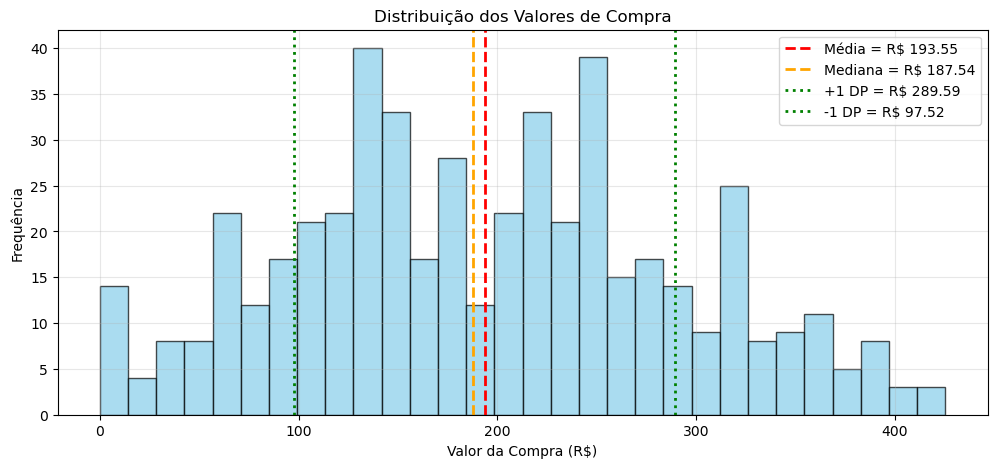

In [9]:
# Separando colunas
visitas_col = dados_ecommerce[:, 0]
tempo_col = dados_ecommerce[:, 1]
itens_col = dados_ecommerce[:, 2]
valor_col = dados_ecommerce[:, 3]

# Calculando as Estatísticas
media_valor = np.mean(valor_col)
mediana_valor = np.median(valor_col)
std_valor = np.std(valor_col)

# --- GRÁFICO ---
plt.figure(figsize = (12, 5))
plt.hist(valor_col, bins = 30, color = 'skyblue', edgecolor = 'black', alpha = 0.7)
plt.axvline(media_valor, color = 'red', linestyle = '--',linewidth = 2, label = f'Média = R$ {media_valor:.2f}')
plt.axvline(mediana_valor, color = 'orange', linestyle = '--', linewidth = 2, label = f'Mediana = R$ {mediana_valor:.2f}')
plt.axvline(media_valor + std_valor, color = 'green', linestyle = ':', linewidth = 2, label = f'+1 DP = R$ {media_valor + std_valor:.2f}')
plt.axvline(media_valor - std_valor, color = 'green', linestyle = ':', linewidth = 2, label = f'-1 DP = R$ {media_valor - std_valor:.2f}')
plt.legend()
plt.title('Distribuição dos Valores de Compra')
plt.xlabel('Valor da Compra (R$)')
plt.ylabel('Frequência')
plt.grid(alpha = 0.3)
plt.show()



**Resposta da Pergunta 1:**

O usuário acessa o site, em média, cerca de 26 vezes por mês, permanece em média 20 minutos navegando, adiciona aproximadamente 5 itens ao carrinho e realiza compras com ticket médio de R$ 193,55.

Mas há grande variação entre clientes, alguns compram valores baixos a partir de R$ 14,58.

Enquanto outros chegam a gastar até R$ 425,37.

## 5. Segmentação e Análise de Clientes

Usando a indexação booleana para filtrar e analisar segmentos específicos de clientes.

### Pergunta 2

Quais são as características e comportamentos distintos dos nossos clientes de "Alto Valor"? Eles visitam mais o site? Passam mais tempo navegando?

In [10]:
# Filtro booleano para clientes com compras > R$ 250
clientes_alto_valor = dados_ecommerce[dados_ecommerce[:, 3] > 250]

print("\n--- ANÁLISE: CLIENTES DE ALTO VALOR (Compras > R$ 250) ---\n")
print(f"Número de clientes de alto valor: {clientes_alto_valor.shape[0]}")

# Estatísticas deste segmento
media_visitas_alto_valor = np.mean(clientes_alto_valor[:, 0])
media_tempo_alto_valor = np.mean(clientes_alto_valor[:, 1])

print(f"Média de visitas desses clientes: {media_visitas_alto_valor:.2f}")
print(f"Média de tempo no site desses clientes: {media_tempo_alto_valor:.2f} min")


--- ANÁLISE: CLIENTES DE ALTO VALOR (Compras > R$ 250) ---

Número de clientes de alto valor: 136
Média de visitas desses clientes: 36.06
Média de tempo no site desses clientes: 20.16 min


**Resposta da Pergunta 2:**

Os clientes de alto valor (aqueles que gastam mais de R$ 250) visitam o site com maior frequência, em média 36 vezes por mês, e permanecem mais tempo navegando, cerca de 20 minutos por sessão. Esse comportamento indica um alto nível de engajamento, sugerindo que quanto mais esses usuários interagem com a plataforma, maior tende a ser o valor de suas compras.

### Pergunta 3

Qual é o comportamento dos usuários que visitam o site, mas não realizam nenhuma compra? Onde está a oportunidade de conversão com este grupo?

In [11]:
# Filtro para visitantes que não compraram
visitantes_sem_compra = dados_ecommerce[dados_ecommerce[:, 3] == 0]

print("\n--- ANÁLISE: VISITANTES QUE NÃO COMPRAM ---\n")
print(f"Número de visitantes que não compraram: {visitantes_sem_compra.shape[0]}")

# Estátísticas deste segmento
media_visitas_sem_compra = np.mean(visitantes_sem_compra[:, 0])
media_tempo_sem_compra = np.mean(visitantes_sem_compra[:, 1])

print(f"Média de visitas desses visitantes: {media_visitas_sem_compra:.2f}")
print(f"Apesar de não comprarem, eles passam em média {media_tempo_sem_compra:.2f} min no site.")


--- ANÁLISE: VISITANTES QUE NÃO COMPRAM ---

Número de visitantes que não compraram: 14
Média de visitas desses visitantes: 5.86
Apesar de não comprarem, eles passam em média 20.60 min no site.


**Resposta da Pergunta 3:**

Os usuários que não realizam compras visitam o site em média 6 vezes e permanecem cerca de 21 minutos navegando, mas não finalizam nenhuma transação. Esse comportamento mostra que, mesmo com algum nível de interesse, eles acabam desistindo antes da compra, representando uma oportunidade para ações de remarketing, otimização do checkout e estratégias de incentivo, como descontos ou frete grátis, para aumentar a conversão.

## 6. Análise de Correlação

Vamos investigar a relação entre as diferentes variáveis. Uma matriz de correlação nos mostra como as variáveis se movem juntas.

- +1: Correlação positiva perfeita
- -1: Correlação negativa perfeita
- 0: Nenhuma correlação linear

### Pergunta 4

Existe uma correlação estatisticamente relevante entre o tempo gasto no site, o número de itens no carrinho e o valor final da compra?

In [12]:
# A função corrcoef calcula a matriz de correlação
# rowvar=False indica que as colunas são as variáveis
matriz_correlação = np.corrcoef(dados_ecommerce, rowvar = False)

print("\n--- MATRIZ DE CORRELAÇÃO ---\n")
print("[Visitas, Tempo, Itens, Valor]\n")
print(np.round(matriz_correlação, 2))



--- MATRIZ DE CORRELAÇÃO ---

[Visitas, Tempo, Itens, Valor]

[[1.   0.05 0.55 0.54]
 [0.05 1.   0.02 0.02]
 [0.55 0.02 1.   0.99]
 [0.54 0.02 0.99 1.  ]]


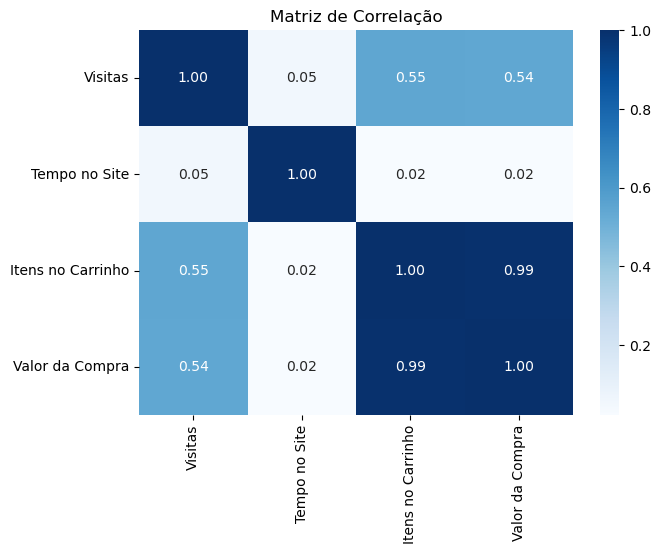

In [24]:
# calcula a matriz de correlação
matriz_correlação = np.corrcoef(dados_ecommerce, rowvar = False)

# Define os nomes das variáveis
nomes_variaveis = ["Visitas", "Tempo no Site", "Itens no Carrinho", "Valor da Compra"]

# Converte em DataFrame para exibir com rótulos
df_correlacao = pd.DataFrame(matriz_correlação, index = nomes_variaveis, columns = nomes_variaveis)

# Matriz de correlação (mapa de calor)
plt.figure(figsize = (7, 5))
sns.heatmap(df_correlacao, annot = True, cmap = "Blues", fmt = ".2f")
plt.title("Matriz de Correlação")
plt.show()

**Resposta da Pergunta 4:**

A matriz está organizada na ordem [Visitas, Tempo, Itens, Valor]. Os valores variam entre –1 e +1, onde:

- +1 indica correlação positiva perfeita
- 0 indica ausência de correlação
- –1 indica correlação negativa perfeita

No trecho relevante para a pergunta:

- Tempo ↔ Valor = 0,02 → ausência de correlação

- Itens ↔ Valor = 0,99 → correlação positiva quase perfeita (neste conjunto de dados, valor cresce proporcionalmente ao número de itens)

- Tempo ↔ Itens = 0,02 → ausência de correlação

Esses resultados indicam que o tempo gasto no site não possui relação estatisticamente relevante nem com o número de itens adicionados ao carrinho, nem com o valor final da compra. Em outras palavras, usuários que passam mais tempo no site não necessariamente compram mais itens nem gastam mais.

Por outro lado, observa-se uma correlação extremamente forte entre o número de itens no carrinho e o valor final da compra. Isso sugere que, neste conjunto de dados, o valor total da compra cresce quase de forma proporcional à quantidade de itens adquiridos, possivelmente porque os produtos têm preços semelhantes ou seguem uma estrutura de preço linear.

Assim, a resposta para a pergunta seria:

- Parcialmente. Não há correlação relevante envolvendo o tempo gasto no site. No entanto, existe uma correlação positiva quase perfeita entre o número de itens no carrinho e o valor final da compra, indicando que o principal fator associado ao valor gasto é a quantidade de itens adquiridos, e não o tempo de navegação.

## Passo 7: Relatório Final, Conclusões e Insights a Partir dos Dados

A análise estatística dos dados de navegação e compras dos usuários do e-commerce permitiu compreender melhor o comportamento dos clientes e identificar padrões diretamente relacionados à geração de receita.

**1. Perfil Geral dos Usuários**

Os usuários acessam a plataforma em média 25,86 vezes por mês, permanecendo cerca de 19,85 minutos no site por sessão. Cada cliente adiciona, em média, 5,51 itens ao carrinho e realiza compras com ticket médio de R$ 193,55. 

A mediana do valor gasto é de R$ 187,54.

Isso indica que metade dos clientes compra abaixo e metade acima desse valor. Observou-se uma dispersão considerável nos gastos (desvio padrão de R$ 96,03). As compras variam de 14,58 (mínimo) a 425,37 (máximo registrado).

Esses indicadores sugerem a presença de um comportamento de compra heterogêneo, com uma parcela dos consumidores realizando gastos significativamente acima da média, o que contribui para o aumento do valor médio observado. Ao mesmo tempo, o elevado desvio padrão evidencia uma grande variabilidade nos valores das compras, indicando que o padrão de consumo não é uniforme entre os usuários da plataforma.